In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def portfolio_metrics(weights_dict, start='2024-01-01', end='2024-12-31', risk_free_rate=0.0, plot=True):
    symbols = list(weights_dict.keys())
    weights = np.array(list(weights_dict.values()))
    
    # Step 1: Download price data
    df = pd.DataFrame()
    for symbol in symbols:
        df[symbol] = yf.download(symbol, start=start, end=end)['Close']

    # Step 2: Calculate daily returns
    returns = df.pct_change().dropna()
    
    # Step 3: Portfolio returns
    portfolio_returns = returns.dot(weights)
    cum_returns = (1 + portfolio_returns).cumprod()
    
    # Step 4: Metrics
    avg_return = portfolio_returns.mean()
    std_dev = portfolio_returns.std()
    rms = np.sqrt(np.mean(np.square(portfolio_returns)))
    sharpe = (avg_return - risk_free_rate) / std_dev
    max_dd = ((cum_returns - cum_returns.cummax()) / cum_returns.cummax()).min()
    
    # Step 5: Plot
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(cum_returns.index, cum_returns, label='Portfolio')
        plt.title('Portfolio Cumulative Return')
        plt.xlabel('Date')
        plt.ylabel('Growth of ₹1 Investment')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    
    # Step 6: Return metrics
    return {
        'Average Daily Return (%)': round(avg_return * 100, 4),
        'Standard Deviation (%)': round(std_dev * 100, 4),
        'RMS Volatility (%)': round(rms * 100, 4),
        'Sharpe Ratio': round(sharpe, 4),
        'Max Drawdown (%)': round(max_dd * 100, 4)
    }

In [18]:
# def portfolio_metrics(weights_dict,start='2024-01-01',end='2024-12-31',risk_free_rate=0.0,plot=True):
#     symbols = list(weights_dict.keys())
#     weights = np.array(list(weights_dict.values))

#     #Step 1 = Download Price data

#     df = pd.DataFrame()
#     for symbol in symbols:
#         df[symbol]=yf.download(symbol,start=start,end=end)['Close']

#     #Step 2 = Calculate daily returns

#     returns = df.pct_change().dropna()

#     #Step 3 = Portfolio returns

#     portfolio_returns = returns.dot(weights)
#     cum_returns = (1 + portfolio_returns).cumprod()

#     #Step 4 = Metrics

#     avg_return = portfolio_returns.mean()
#     std_dev = portfolio_returns.std()
#     rms = np.sqrt(np.mean(np.square(portfolio_returns)))
#     sharpe = (avg_return - risk_free_rate) / std_dev
#     max_dd = ((cum_returns - cum_returns.cummax()) / cum_returns.cummax()).min()

#      # Step 5: Plot
#     if plot:
#         plt.figure(figsize=(10, 5))
#         plt.plot(cum_returns.index, cum_returns, label='Portfolio')
#         plt.title('Portfolio Cumulative Return')
#         plt.xlabel('Date')
#         plt.ylabel('Growth of ₹1 Investment')
#         plt.grid(True, linestyle='--', alpha=0.6)
#         plt.tight_layout()
#         plt.show()
    
#     # Step 6: Return metrics
#     return {
#         'Average Daily Return (%)': round(avg_return * 100, 4),
#         'Standard Deviation (%)': round(std_dev * 100, 4),
#         'RMS Volatility (%)': round(rms * 100, 4),
#         'Sharpe Ratio': round(sharpe, 4),
#         'Max Drawdown (%)': round(max_dd * 100, 4)
#     }

C:\Users\heman_q\AppData\Local\Temp\ipykernel_7120\1049827183.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] = yf.download(symbol, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\heman_q\AppData\Local\Temp\ipykernel_7120\1049827183.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df[symbol] = yf.download(symbol, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed


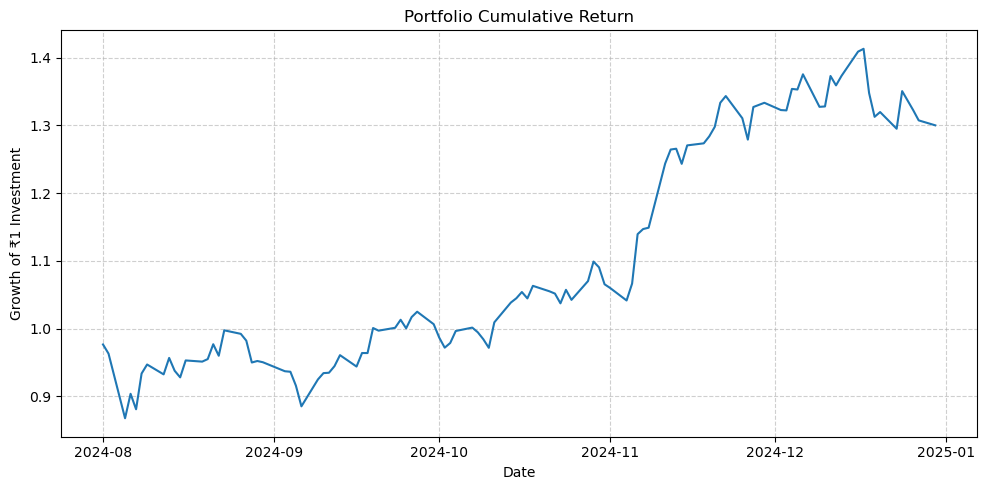

{'Average Daily Return (%)': 0.2803,
 'Standard Deviation (%)': 2.4621,
 'RMS Volatility (%)': 2.4663,
 'Sharpe Ratio': 0.1139,
 'Max Drawdown (%)': -11.2468}

In [22]:
portfolio_metrics({'BTC': 0.6, 'SPY': 0.4})
